In [71]:
import os
import pynbody
from pynbody.analysis import profile
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
from astropy.io import ascii
from astropy.table import Table
import pandas as pd
%matplotlib inline
from analyze_sumfiles import get_sumfile
import scipy.interpolate as imterpolate
# plt.style.use('dark_background')

In [2]:
!ls /home/michele/sim/MySimulations/Moria8Gyr_tidal/results/sumfiles

60003.dat			       69002_p200.0_a600.0_r600.0_c8.15.dat
62002.dat			       69002_p400.0_a600.0_r600.0_c8.15.dat
68003.dat			       69002_p598.0_a600.0_r600.0_c8.15.dat
69002.dat			       71002.dat
69002_p200.0_a1000.0_r800.0_c8.15.dat


In [3]:
tidal_folder = "/home/michele/sim/MySimulations/Moria8Gyr_tidal/results/sumfiles/"
kick1 = os.path.join(tidal_folder, "69002_p200.0_a1000.0_r800.0_c8.15.dat")
kick2 = os.path.join(tidal_folder, "69002_p200.0_a600.0_r600.0_c8.15.dat")
kick3 = os.path.join(tidal_folder, "69002_p598.0_a600.0_r600.0_c8.15.dat")
moria = "/home/michele/sim/MoRIA/results/sumfiles/69002.dat"

In [4]:
a = get_sumfile(moria)
k1 = get_sumfile(kick1)
k2 = get_sumfile(kick2)
k3 = get_sumfile(kick3)
kicked = [k1, k2, k3]

In [5]:
a

nr,time,redshift,ngas,nstar,ndark,Mgas,Mstar,Mdark,MHI,r_e_L,r_e_M,r_e_M_DM,velDisp_star,velDisp_DM,kinE_star,kinE_DM,SFR,M_U,M_B,M_V,M_R,M_I,M_J,M_H,M_K,metall_star,FeH_star,MgFe_star,metall_lum,FeH_lum,age_lum,Mgas_re,Mstar_re,Mdark_re,rcom_x,rcom_y,rcom_z,vcom_x,vcom_y,vcom_z,L_x,L_y,L_z,r0,sig(r0),n,sig(n),mu0,sig(mu0),gas<1Re,gas<2Re,gas<3Re,gas<4Re,gas<5Re,gas<10Re,gas<30Re,gas_all,DM<1Re,DM<2Re,DM<3Re,DM<4Re,DM<5Re,DM<10Re,DM<30Re,DM_all
,kpc s / km,,,,,1e+06 solMass,1e+06 solMass,1e+06 solMass,1e+06 solMass,kpc,kpc,kpc,km / s,km / s,km / s,1e+06 km solMass / s,solMass / yr,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,1e+06 solMass,1e+06 solMass,1e+06 solMass,km,km,km,km / s,km / s,km / s,1e+06 km kpc solMass / s,1e+06 km kpc solMass / s,1e+06 km kpc solMass / s,kpc,kpc,,,arcsec2 mag,arcsec2 mag,,,,,,,,,,,,,,,,
int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64
0,5.0,1.1565,928930.0,6580,935510.0,9842.8,50.489,46777,436.57,1.2665,1.6495,4.6985,20.084,42.595,51993.0,48421000.0,0.0,-15.29,-15.091,-15.475,-15.813,-16.182,nan,nan,nan,0.0005579,-1.9022,0.45313,0.0010742,-1.5772,1.5248,100.88,197.5,310.16,0.89616,5.7208,-10.86,2.1808,-1.6997,-2.997,2.1808,-1.6997,-2.997,0.70844,0.30356,0.7134,0.51562,22.956,0.58067,0.0069957,0.020412,0.034587,0.045844,0.052126,0.064094,0.088615,1,0.0024884,0.011526,0.023902,0.038089,0.05244,0.11811,0.26366,1
1,5.0,1.1637,928930.0,6580,935510.0,9842.8,50.489,46777,442.17,1.2655,1.6485,4.6995,19.461,42.594,51991.0,48421000.0,0.0,-15.29,-15.091,-15.475,-15.813,-16.182,nan,nan,nan,0.0005579,-1.9022,0.45313,0.0010741,-1.5772,1.5249,100.77,197.1,309.64,0.89422,5.7219,-10.86,2.181,-1.7002,-2.9956,2.181,-1.7002,-2.9956,0.70982,0.33325,0.74711,0.57132,22.951,0.61231,0.0069871,0.020415,0.034593,0.045844,0.052131,0.064095,0.088614,1,0.0024948,0.011526,0.023901,0.038088,0.052444,0.11811,0.26366,1
2,5.05,1.1492,928880.0,6626,935510.0,9842.3,50.931,46777,443.86,1.4355,1.7905,4.8825,17.066,33.857,46651.0,47311000.0,0.009855,-15.247,-15.069,-15.472,-15.82,-16.199,nan,nan,nan,0.00056729,-1.8944,0.45273,0.0010665,-1.5785,1.5719,97.124,217.5,325.34,0.61347,4.8346,-10.203,1.9998,-2.1862,-0.73486,1.9998,-2.1862,-0.73486,0.047705,181810000.0,-0.03258,2642700000.0,24.156,0.10102,0.0045149,0.019432,0.038444,0.048097,0.053463,0.064709,0.088879,1,0.0018759,0.010327,0.023757,0.038032,0.052106,0.11225,0.26478,1
3,5.1,1.1349,928790.0,6717,935510.0,9841.5,51.766,46777,461.22,1.4615,1.8195,5.1225,15.968,32.968,44642.0,46907000.0,0.019562,-15.313,-15.116,-15.504,-15.843,-16.215,nan,nan,nan,0.00059096,-1.8755,0.45204,0.0011051,-1.5622,1.5209,116.29,212.85,340.23,0.40206,4.7185,-10.058,1.7326,-2.2427,-0.053696,1.7326,-2.2427,-0.053696,0.23302,1.5096,2.3238,4.9732,22.574,3.0711,0.0066448,0.019863,0.037988,0.048139,0.054289,0.065257,0.089164,1,0.0018364,0.009524,0.021601,0.035404,0.049436,0.10806,0.26688,1
4,5.15,1.1208,928730.0,6778,935510.0,9841.0,52.299,46777,457.97,1.1925,1.6245,5.2365,14.929,36.272,47198.0,47783000.0,0.013128,-15.316,-15.118,-15.5,-15.836,-16.202,nan,nan,nan,0.00060774,-1.8629,0.45168,0.0011314,-1.5521,1.5351,96.136,150.1,257.52,0.71919,4.8095,-10.567,3.1096,-2.804,-1.4842,3.1096,-2.804,-1.4842,0.99037,0.038335,0.10965,0.079627,23.604,0.14868,0.0067281,0.021027,0.03481,0.047936,0.055519,0.065782,0.089582,1,0.0021026,0.010216,0.021571,0.034539,0.048017,0.10655,0.26801,1
5,5.2,1.1069,928650.0,6856,935510.0,9840.3,52.976,46777,447.4,1.4465,1.7445,5.2265,27.238,40.488,45740.0,49018000.0,0.016789,-15.333,-15.137,-15.52,-15.856,-16.224,nan,nan,nan,0.00062819,-1

In [72]:
names = ['200x1000', '200x600', '600x600']
def plot_property_multi(reference, tables, prop, unit=None, ax=None, log=False, plot_r=True, smooth=False, names=names):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,5))
    if unit is None:
        unit = reference[prop].unit
    time = reference['time'].to(u.Gyr)
    ax.plot(time, reference[prop].to(unit), "r", label="MoRIA")
    kicked = list()
    for t in tables:
        kicked.append(np.interp(reference['time'], t['time'], t[prop].to(unit), left=np.nan))
    for i, k in enumerate(kicked):
#         if smooth:
#             x = time[:-1]
#             y = k[:-1]
#             t, c, k = interpolate.splrep(x, y, s=0, k=4)
#             x_smooth = np.linspace(x.min(), x.max(), 500)
#             y_smooth = spline(x, y, x_smooth)
#             ax.plot(x_smooth, y_smooth, label="{}".format(names[i]))
#         else:
        ax.plot(time[:-1], k[:-1], label="{}".format(names[i]))
        if log:
            ax.set_yscale('log')
        ax.set_xlabel('time (Gyr)')
    if unit is not u.dimensionless_unscaled:
        ax.set_ylabel("{0} ({1:latex})".format(prop,unit))
    else:
        ax.set_ylabel("{0}".format(prop))
    ax.set_title(prop)
    ax.legend(loc=0)
    if plot_r:
        r = list()
        for t in tables:
            r_ = np.sqrt(t['rcom_x']**2 + t['rcom_y']**2 + t['rcom_z']**2)
            r.append(np.interp(reference['time'], t['time'], r_, left=np.nan))
        ax1 = ax.twinx()
        for i, k in enumerate(kicked):
            ax1.plot(time[:-1], r[i][:-1], '--', alpha=0.6)
            ax1.set_ylabel("$r$ [kpc]")


/home/michele/Software/miniconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


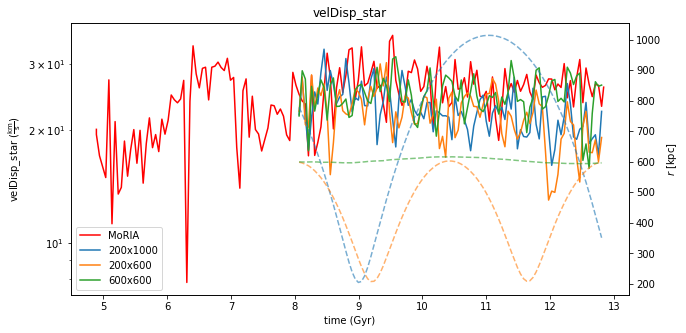

In [73]:
# plot_property_multi(a, kicked, 'Mstar', u.Msun, log=True)
plot_property_multi(a, kicked, 'velDisp_star', log=True, smooth=True)

In [7]:
def plot_orbit(tables):
    fig, ax = plt.subplots(figsize=(5,5), dpi=200)
    for i, k in enumerate(kicked):
        ax.plot(k['rcom_x'], k['rcom_y'], label="{}".format(names[i]))
        ax.set_xlabel('r [kpc]')
        ax.plot(0,0, "r+")
        ax.set_ylabel('r [kpc]')
        ax.set_aspect('equal')
        plt.legend(loc=0)

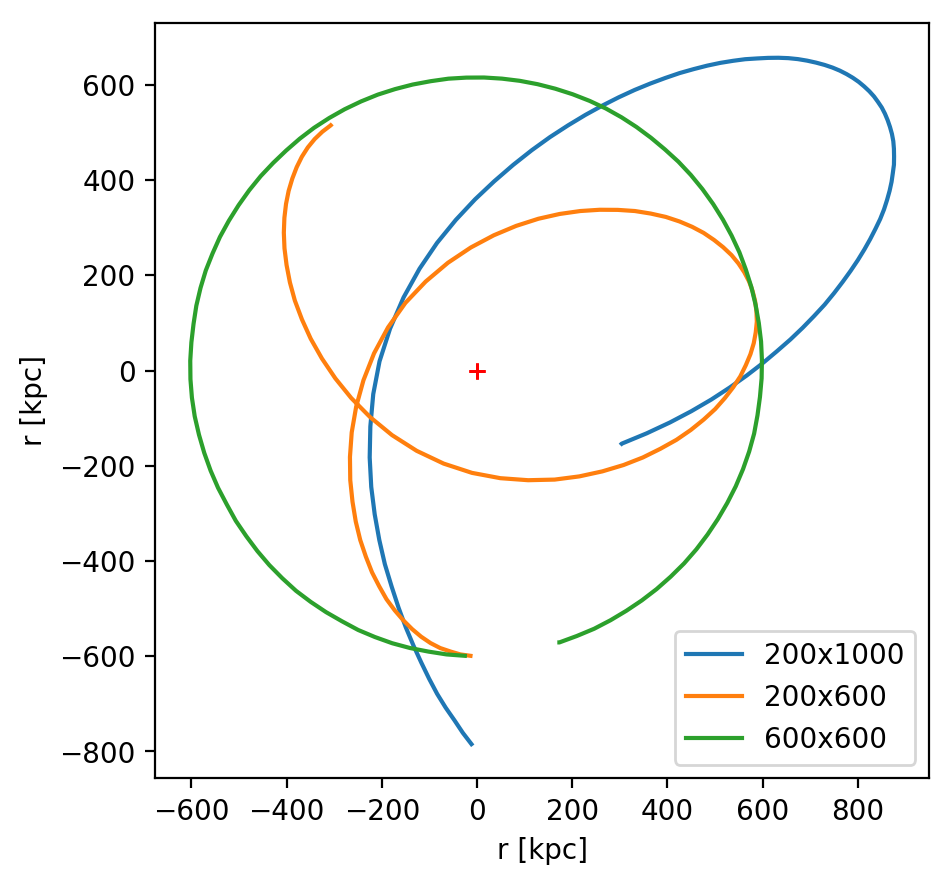

In [8]:
plot_orbit(kicked)

In [10]:
# fig, axes = plt.subplots(2, figsize=(8,6))
# fig.suptitle("Circular velocity")

# for ax, p, in zip(axes, (prof_list, prof_list_k)):
#     for prof, name in zip(p,['total','dm','stars','gas']):
#         ax.plot(prof['rbins'], prof['v_circ'], label=name)
# #         ax.set_title(title.format(SIM_NUMBER))
#         ax.set_xlabel('$R$ [kpc]');
#         ax.set_ylabel('$v_{circ}$ [km/s]');
# plt.legend(loc='upper right');
# plt.tight_layout()
# fig.subplots_adjust(top=0.88)

/home/michele/Software/miniconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


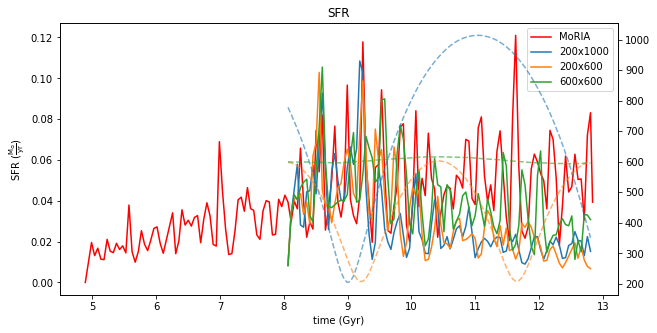

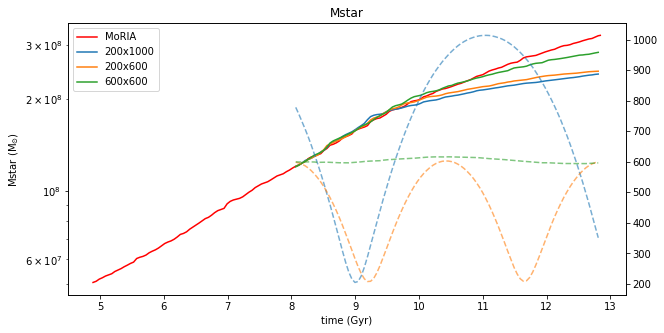

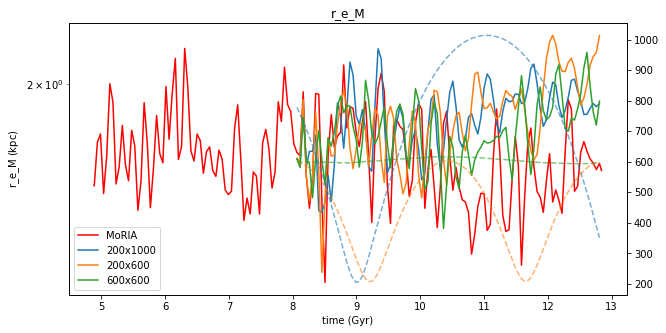

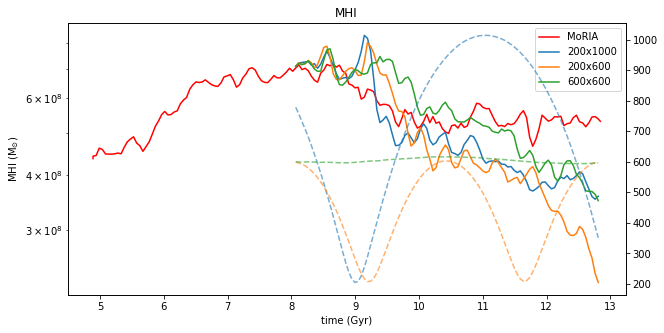

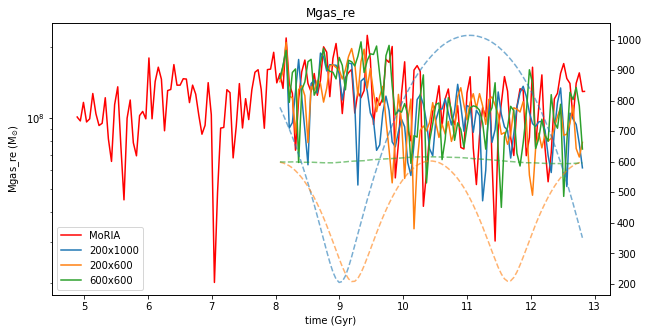

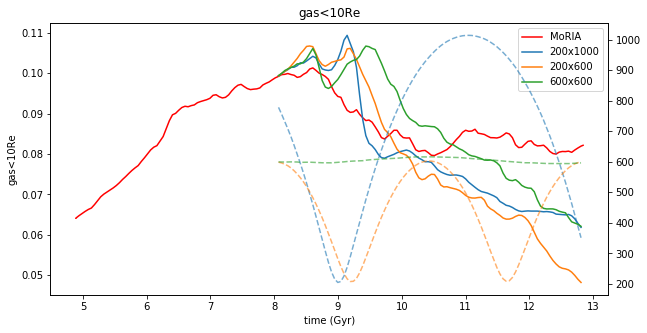

In [49]:
plot_property_multi(a, kicked, 'SFR')
plot_property_multi(a, kicked, 'Mstar', u.Msun, log=True)
plot_property_multi(a, kicked, 'r_e_M', log=True)
plot_property_multi(a, kicked, 'MHI', u.Msun, log=True)
plot_property_multi(a, kicked, 'Mgas_re', u.Msun, log=True)
# plot_property_multi(a, kicked, 'gas<5Re', u.dimensionless_unscaled)
plot_property_multi(a, kicked, 'gas<10Re', u.dimensionless_unscaled)

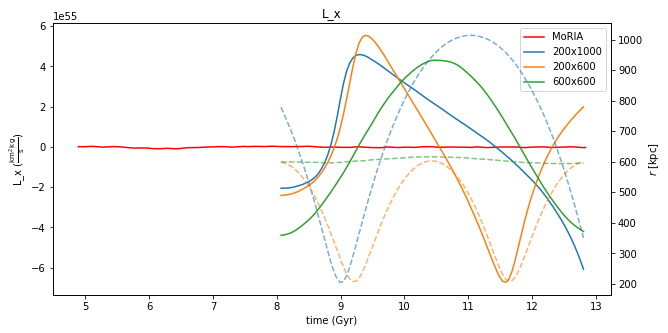

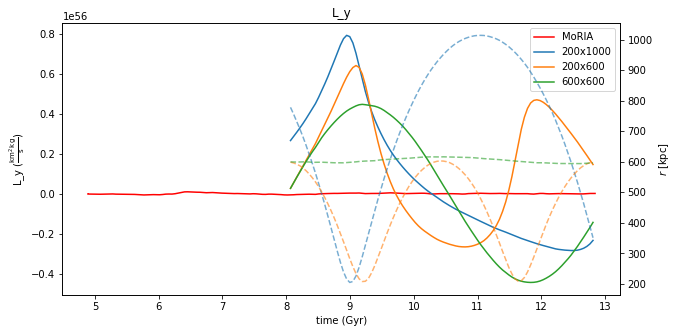

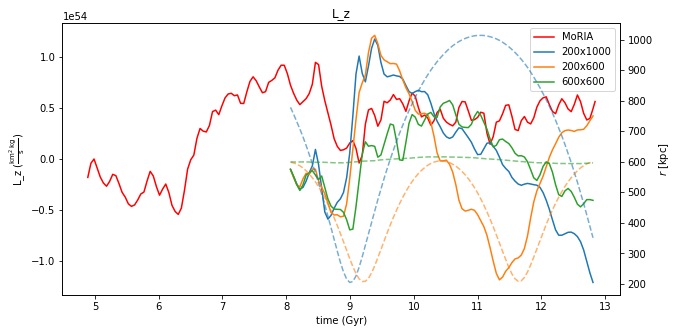

In [56]:
# plot_property_multi(a, kicked, 'L_x', u.kg*u.km**2/u.s)
# plot_property_multi(a, kicked, 'L_y', u.kg*u.km**2/u.s)
# plot_property_multi(a, kicked, 'L_z', u.kg*u.km**2/u.s)